In [1]:
import pytesseract

In [2]:
import cv2

In [3]:
import matplotlib.pyplot as plt

In [4]:
pytesseract.pytesseract.tesseract_cmd=r'C:\\Program Files\\tesseract-OCR\\tesseract.exe'

In [5]:
img=cv2.imread('ca.png')

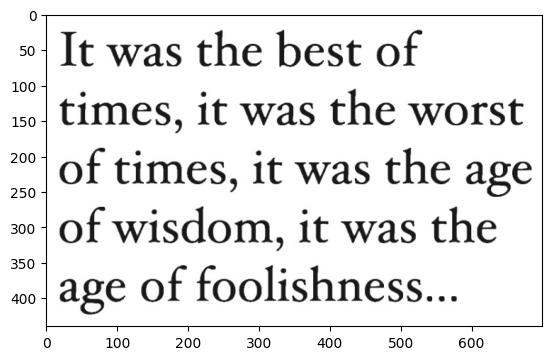

In [6]:
plt.imshow(img)

In [7]:
img2char=pytesseract.image_to_string(img)

In [ ]:
print(img2char)

In [ ]:
imgbox=pytesseract.image_to_boxes(img)

In [ ]:
print(imgbox)

In [ ]:
imgH,imgW,_=img.shape

In [ ]:
print(img.shape)

In [ ]:
for boxes in imgbox.splitlines():
    boxes=boxes.split(' ')
    x,y,w,h=int (boxes[1]),int (boxes[2]),int (boxes[3]),int (boxes[4])
    cv2.rectangle(img,(x,imgH-y),(w,imgH-h),(0,0,255),3)

In [ ]:
plt.imshow(img)

In [ ]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [ ]:

font_scale=2
font=cv2.FONT_HERSHEY_PLAIN
cap=cv2.VideoCapture('c.mp4')
if not cap.isOpened():
    cap=cv2.VideoCapture(0)
if  not cap.isOpened():
    raise IOError("cannot open")
cntr=0
while True:
    ret,frame=cap.read()
    cntr+=1
    if((cntr%20)==0):
        imgW,imgH,_=frame.shape
        
        x1,y1,w1,h1=0,0,imgH,imgW
        imgchar=pytesseract.image_to_string(frame)
        imgboxes=pytesseract.image_to_boxes(frame)
        for boxes in imgboxes.splitlines():
            boxes=boxes.split(' ')
            x1,y1,w1,h1=int (boxes[1]),int (boxes[2]),int (boxes[3]),int (boxes[4])
            cv2.rectangle(frame,(x1,imgH-y1),(w1,imgH-h1),(0,0,255),3)
        cv2.putText(frame,imgchar,(x1+int(w1/50),y1+int(h1/50)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)
        font=cv2.FONT_HERSHEY_SIMPLEX

    cv2.imshow('text Detection',frame)
    if cv2.waitKey(2) & 0xFF==ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

        